## 标准化(Standardization)和归一化(Normalization)概念

### 1.1、定义

归一化和标准化都是对数据做变换的方式，将原始的一列数据转换到某个范围，或者某种形态，具体的：

归一化(NormalizationNormalization)：将一列数据变化到某个固定区间(范围)中，通常，这个区间是[0, 1]，广义的讲，可以是各种区间，比如映射到[0，1]一样可以继续映射到其他范围，图像中可能会映射到[0,255]，其他情况可能映射到[-1,1]；

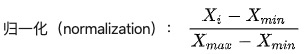

标准化(StandardizationStandardization)：将数据变换为均值为0，标准差为1的分布,切记，并非一定是正态的；

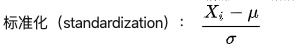

中心化：另外，还有一种处理叫做中心化，也叫零均值处理，就是将每个原始数据减去这些数据的均值。

在网上查阅了很多资料,发现很多博客多这些说法都不同一,下面将进行说明:

不管是归一化还是标准化,都不会改变数据的分布类型,下面直接上图:我取了kaggle的house prices数据集,选了三个特征,一个是价格,一个是土地面积,一个是年份,对三个尽心了归一化和标准化,发现并没有改变数据的分布.<p>
#### 再次强调,不管是归一化还是标准化,都不会改变数据的分布类型.均值为0,方差为1的分布不一定是正态分布.<p>
标准化会让原来的数组平均值变为0,方差变为1.<p>
归一化能让原来的数组最大值变为1,最小值变为0,让数据在同一量纲内计算.<p>
当然，如果你原始数据就是正太的，那么做了StandardizationStandardization，生成的就是标准正态的数据，但是,非正态分布的数据标准化后得到的数据依然不是正太,要想得到标准的正态分布,要对数据进行变换<p>
之所以大家会把标准化和正态分布联系起来，是因为实际数据中大部分都是正态分布，起码近似正态
参考资料:https://blog.csdn.net/weixin_36604953/article/details/102652160

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

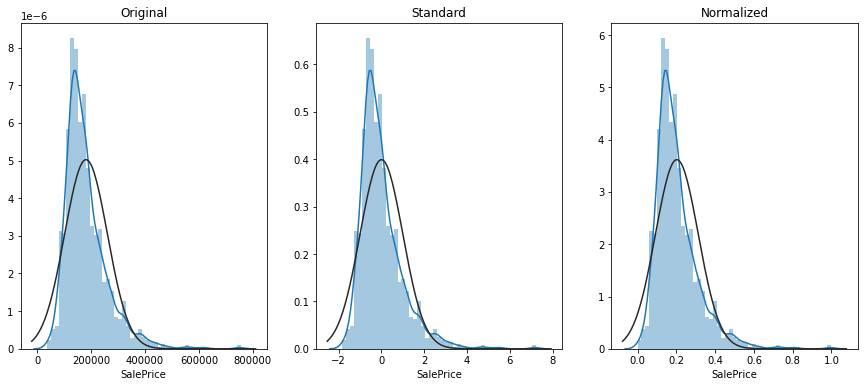

In [5]:
y = train['SalePrice']

standard_y = (y - y.mean())/y.std()
norm_y = (y - y.min())/(y.max() - y.min())
                        
plt.figure(figsize=(15, 6))
                        
plt.subplot(131); plt.title('Original')
sns.distplot(y, kde=True, fit=st.norm)
plt.subplot(132); plt.title('Standard')
sns.distplot(standard_y, kde=True, fit=st.norm)
plt.subplot(133); plt.title('Normalized')
sns.distplot(norm_y, kde=True, fit=st.norm)

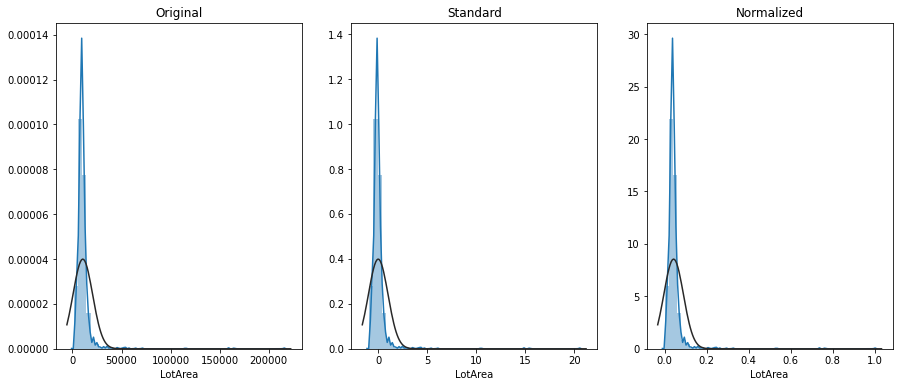

In [6]:
y = train['LotArea']

standard_y = (y - y.mean())/y.std()
norm_y = (y - y.min())/(y.max() - y.min())
                        
plt.figure(figsize=(15, 6))
                        
plt.subplot(131); plt.title('Original')
sns.distplot(y, kde=True, fit=st.norm)
plt.subplot(132); plt.title('Standard')
sns.distplot(standard_y, kde=True, fit=st.norm)
plt.subplot(133); plt.title('Normalized')
sns.distplot(norm_y, kde=True, fit=st.norm)

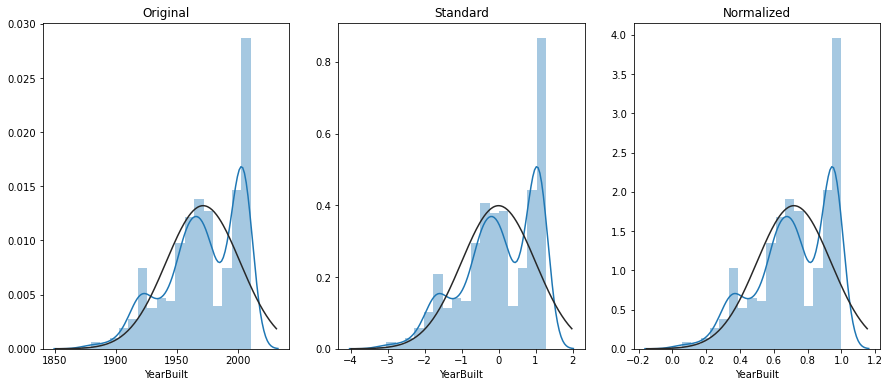

In [7]:
y = train['YearBuilt']

standard_y = (y - y.mean())/y.std()
norm_y = (y - y.min())/(y.max() - y.min())
                        
plt.figure(figsize=(15, 6))
                        
plt.subplot(131); plt.title('Original')
sns.distplot(y, kde=True, fit=st.norm)
plt.subplot(132); plt.title('Standard')
sns.distplot(standard_y, kde=True, fit=st.norm)
plt.subplot(133); plt.title('Normalized')
sns.distplot(norm_y, kde=True, fit=st.norm)

在机器学习领域中，不同评价指标（即特征向量中的不同特征就是所述的不同评价指标）往往具有不同的量纲和量纲单位，这样的情况会影响到数据分析的结果，为了消除指标之间的量纲影响，需要进行数据标准化处理，以解决数据指标之间的可比性。原始数据经过数据标准化处理后，各指标处于同一数量级，适合进行综合对比评价。其中，最典型的就是数据的归一化处理。

参考资料:http://vlambda.com/wz_7ifO8Xtza8W.html

### 何时使用标准化,何时使用归一化

概率模型（树形模型）不需要归一化，因为它们不关心变量的值，而是关心变量的分布和变量之间的条件概率，如决策树、RF。而像Adaboost、SVM、LR、Knn、KMeans之类的最优化问题就需要归一化。

Tree-based models doesn’t depend on scaling

Non-tree-based models hugely depend on scaling

归一化的好处:1. 提升模型的收敛速度;2.提升模型的精度;<p>
参考资料:https://blog.csdn.net/pipisorry/article/details/52247379

参考资料://blog.csdn.net/answer3lin/article/details/84961694

### 什么时候进行标准化

在聚类过程中，标准化显得尤为重要。这是因为聚类操作依赖于对类间距离和类内聚类之间的衡量。如果一个变量的衡量标准高于其他变量，那么我们使用的任何衡量标准都将受到该变量的过度影响。

在PCA降维操作之前。在主成分PCA分析之前，对变量进行标准化至关重要。 这是因为PCA给那些方差较高的变量比那些方差非常小的变量赋予更多的权重。而 标准化原始数据会产生相同的方差，因此高权重不会分配给具有较高方差的变量

KNN操作，原因类似于kmeans聚类。由于KNN需要用欧式距离去度量。标准化会让变量之间起着相同的作用。

在SVM中，使用所有跟距离计算相关的的kernel都需要对数据进行标准化。

在选择岭回归和Lasso时候，标准化是必须的。原因是正则化是有偏估计，会对权重进行惩罚。在量纲不同的情况，正则化会带来更大的偏差。

#### 没有距离度量,权重参数的时候可以不进行标准化,有距离参数或者权重参数的时候需要进行标准化

### 什么时候不需要标准化

当采用普通的线性回归的时候，是无需标准化的。因为标准化前后，不会影响线性回归预测值。
同时，标准化不会影响logistic回归，决策树及其他一些集成学习算法：such as random forest and gradient boosting.

决策树不需要归一化的很大原因应该是：

不需要考虑特征的值，只需要考虑划分界限，比如ID3 C4.5 CART 的熵和基尼系数，研究对象只是概率分布，对数值不关心。

### RobustScaler

如果你的数据包含许多异常值，使用均值和方差缩放可能并不是一个很好的选择。这种情况下，你可以使用 robust_scale 以及 RobustScaler 作为替代品。它们对你的数据的中心和范围使用更有鲁棒性的估计。